<a href="https://colab.research.google.com/github/Rocking-Priya/2025-summer-mod-6/blob/main/Mod_6_Homework_Reflections_5_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework Reflection 5

1. Draw a diagram for the following negative feedback loop:

Sweating causes body temperature to decrease.  High body temperature causes sweating.

A negative feedback loop means that one thing increases another while the second thing decreases the first.

Remember that we are using directed acyclic graphs where two things cannot directly cause each other.

2. Describe an example of a positive feedback loop.  This means that one things increases another while the second things also increases the first.

3. Draw a diagram for the following situation:

Lightning storms frighten away deer and bears, decreasing their population, and cause flowers to grow, increasing their population.
Bears eat deer, decreasing their population.
Deer eat flowers, decreasing their population.

Write a dataset that simulates this situation.  (Show the code.) Include noise / randomness in all cases.

Identify a backdoor path with one or more confounders for the relationship between deer and flowers.

4. Draw a diagram for a situation of your own invention.  The diagram should include at least four nodes, one confounder, and one collider.  Be sure that it is acyclic (no loops).  Which node would say is most like a treatment (X)?  Which is most like an outcome (Y)?


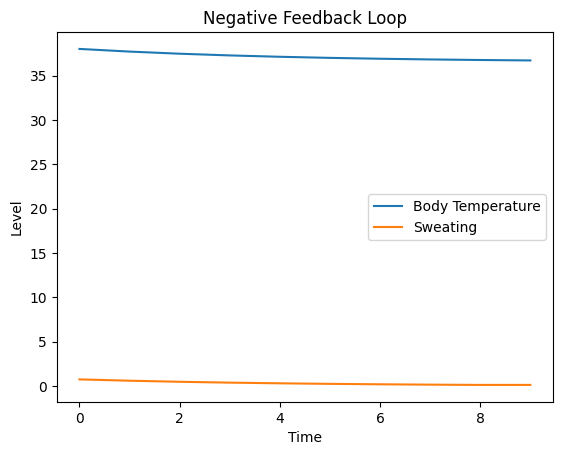

In [4]:
#Question 1.Draw a diagram for the following negative feedback loop
import matplotlib.pyplot as plt

# Simulate over 10 time steps
time = np.arange(10)
body_temp = [38]  # start with high temperature
sweating = []

for t in time[:-1]:
    sweat = 0.5 * (body_temp[t] - 36.5)  # more sweating above normal temp
    temp_next = body_temp[t] - 0.4 * sweat  # sweat cools body
    sweating.append(sweat)
    body_temp.append(temp_next)

sweating.append(sweat)

# Plot the feedback
plt.plot(time, body_temp, label="Body Temperature")
plt.plot(time, sweating, label="Sweating")
plt.xlabel("Time")
plt.ylabel("Level")
plt.legend()
plt.title("Negative Feedback Loop")
plt.show()


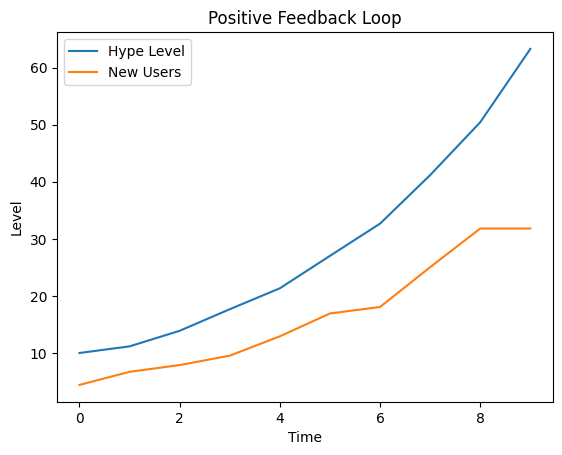

In [5]:
#  Positive Feedback Loop Example in Code
# Initialize
time = np.arange(10)
hype = [10]
users = []

for t in time[:-1]:
    user_growth = hype[t] * 0.6 + np.random.normal(0, 1)
    hype_next = hype[t] + user_growth * 0.4 + np.random.normal(0, 1)
    users.append(user_growth)
    hype.append(hype_next)

users.append(user_growth)

# Plot positive feedback
plt.plot(time, hype, label="Hype Level")
plt.plot(time, users, label="New Users")
plt.xlabel("Time")
plt.ylabel("Level")
plt.legend()
plt.title("Positive Feedback Loop")
plt.show()


In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)  # for consistent results

n = 100  # number of observations

# Start with random lightning values
lightning = np.random.normal(loc=5, scale=2, size=n)

# Deer, Bears, and Flowers are influenced by lightning (with noise)
deer = 50 - 2 * lightning + np.random.normal(0, 2, n)
bears = 40 - 1.5 * lightning + np.random.normal(0, 2, n)
flowers = 30 + 3 * lightning + np.random.normal(0, 2, n)

# Bears eat deer
deer -= 0.5 * bears

# Deer eat flowers
flowers -= 0.4 * deer

# Combine into a DataFrame
df = pd.DataFrame({
    'lightning': lightning,
    'deer': deer,
    'bears': bears,
    'flowers': flowers
})

print(df.head())


   lightning       deer      bears    flowers
0   5.993428  19.319686  31.725432  38.594421
1   4.723471  22.693586  34.036362  33.972618
2   6.295377  20.362298  32.723037  42.235799
3   8.046060  17.284069  30.038515  48.445292
4   4.531693  25.390481  30.447121  33.397084


In [6]:
print(df[['deer', 'flowers', 'lightning']].corr())

               deer   flowers  lightning
deer       1.000000 -0.837060  -0.782441
flowers   -0.837060  1.000000   0.952824
lightning -0.782441  0.952824   1.000000


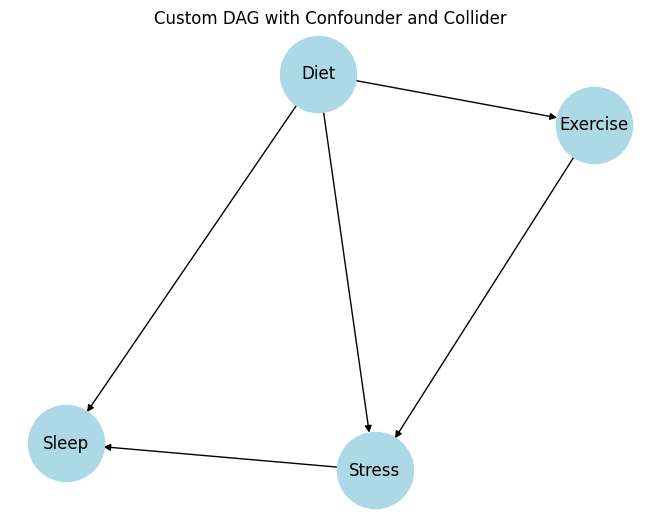

In [7]:
import networkx as nx

G = nx.DiGraph()
G.add_edges_from([
    ("Diet", "Exercise"),
    ("Diet", "Stress"),
    ("Exercise", "Stress"),
    ("Diet", "Sleep"),
    ("Stress", "Sleep")
])

# Plot
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=3000, font_size=12, arrows=True)
plt.title("Custom DAG with Confounder and Collider")
plt.show()
